In [1]:
import csv
import pandas as pd
import numpy as np
from IPython.display import display
pd.set_option('display.max_columns', None)
np.random.seed(621)

# McPAS Analytics
- Make sure to delete the empty entry at the end of the file

In [2]:
mcpas = pd.read_csv('McPAS-TCR.csv', encoding='latin', low_memory=False)
mcpas

,CDR3.alpha.aa,CDR3.beta.aa,Species,Category,Pathology,Pathology.Mesh.ID,Additional.study.details,Antigen.identification.method,Single.cell,NGS,Antigen.protein,Protein.ID,Epitope.peptide,Epitope.ID,MHC,Tissue,T.Cell.Type,T.cell.characteristics,CDR3.alpha.nt,TRAV,TRAJ,TRBV,TRBD,TRBJ,Reconstructed.J.annotation,CDR3.beta.nt,Mouse.strain,PubMed.ID,Remarks
0,NaN,CASSDAGANTEVF,Mouse,Pathogens,Lymphocytic choriomeningitis virus (LCMV),D008217,NaN,2.1,No,No,Pre-glycoprotein polyprotein GP complex,P09991,IKAVYNFATCG,26751,H-2db,NaN,CD8,NaN,NaN,NaN,NaN,TRBV8-1,NaN,TRBJ1-1,No,NaN,P14,1716213.0,NaN
1,NaN,CASSDAGAYAEQF,Mouse,Pathogens,Lymphocytic choriomeningitis virus (LCMV),D008217,NaN,2.1,No,No,Pre-glycoprotein polyprotein GP complex,P09991,IKAVYNFATCG,26751,H-2db,NaN,CD8,NaN,NaN,NaN,NaN,TRBV8-1,NaN,TRBJ2-1,No,NaN,P14,1716213.0,NaN
2,NaN,CASSDAGGAAEVF,Mouse,Pathogens,Lymphocytic choriomeningitis virus (LCMV),D008217,NaN,2.1,No,No,Pre-glycoprotein polyprotein GP complex,P09991,IKAVYNFATCG,26751,H-2db,NaN,CD8,NaN,NaN,NaN,NaN,TRBV8-3,NaN,TRBJ1-1,No,NaN,P14,1716213.0,NaN
3,NaN,CASSDAGHSPLYF,Mouse,Pathogens,Lymphocytic choriomeningitis virus (LCMV),D008217,NaN,2.1,No,No,Pre-glycoprotein polyprotein GP complex,P09991,IKAVYNFATCG,26751,H-2db,NaN,CD8,NaN,NaN,NaN,NaN,TRBV8-1,NaN,TRBJ1-6,No,NaN,P14,1716213.0,NaN
4,NaN,CASSDAWGGAEQYF,Mouse,Pathogens,Lymphocytic choriomeningitis virus (LCMV),D008217,NaN,2.1,No,No,Pre-glycoprotein polyprotein GP complex,P09991,IKAVYNFATCG,26751,H-2db,NaN,CD8,NaN,NaN,NaN,NaN,TRBV8-3,NaN,TRBJ2-6,No,NaN,P14,1716213.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38788,NaN,CSVSDGNQPQHF,Human,Pathogens,M.Tuberculosis,D009169,Bulk,2.2,No,Yes,NaN,NaN,NaN,NaN,NaN,PBMC,CD4,NaN,NaN,NaN,NaN,TRBV29-1,NaN,NaN,NaN,NaN,NaN,32341563.0,NaN
38789,NaN,CSVTEGQRIF,Human,Pathogens,M.Tuberculosis,D009169,Bulk,2.2,No,Yes,NaN,NaN,NaN,NaN,NaN,PBMC,CD4,NaN,NaN,NaN,NaN,TRBV29-1,NaN,NaN,NaN,NaN,NaN,32341563.0,NaN
38790,NaN,CSVVWSVMENEKLFF,Human,Pathogens,M.Tuberculosis,D009169,Bulk,2.2,No,Yes,NaN,NaN,NaN,NaN,NaN,PBMC,CD4,NaN,NaN,NaN,NaN,TRBV29-1,NaN,NaN,NaN,NaN,NaN,32341563.0,NaN
38791,NaN,CVSSDGRGQVYNEQFF,Human,Pathogens,M.Tuberculosis,D009169,Bulk,2.2,No,Yes,NaN,NaN,NaN,NaN,NaN,PBMC,CD4,NaN,NaN,NaN,NaN,TRBV25-1,NaN,NaN,NaN,NaN,NaN,32341563.0,NaN


## McPAS Summary Statistics 

In [3]:
def describe_mcpas(df):
    print('Mouse Samples: ', len(df[df['Species'] == 'Mouse']))
    print('Human Samples: ', len(df[df['Species'] == 'Human']))
    print('Unique Antigen Sequences: ', len(df['Epitope.peptide'].unique()))
    print('Cancer Based Samples: ', len(df[df['Category'] == 'Cancer']))
    print('CD8 T-Cell Samples: ', len(df[df['T.Cell.Type'] == 'CD8']))
    print('CD4 T-Cell Samples: ', len(df[df['T.Cell.Type'] == 'CD4']))
    print('MHC I Samples: ', len(df[df['MHC'].str.match('^HLA-[ABC]')==True]))
    print('MHC II Sample: ', len(df[df['MHC'].str.match('^(HLA-D|DR|D)')==True]))
    print('TCR-Epitope Pairs Available: ', len(df))

# McPAS TCR Beta Sequences
mcpas_beta_pairs = mcpas.loc[(mcpas['CDR3.beta.aa'].notnull()) & (mcpas['Epitope.peptide'].notnull())]
print('McPAS TCR Beta Sequences')
print('Unique CDR3 Beta Sequences: ', len(mcpas_beta_pairs['CDR3.beta.aa'].unique()))
describe_mcpas(mcpas_beta_pairs)

# McPAS TCR Alpha Sequences
mcpas_alpha_pairs = mcpas.loc[(mcpas['CDR3.alpha.aa'].notnull()) & (mcpas['Epitope.peptide'].notnull())]
print('\nMcPAS TCR Alpha Sequences')
print('Unique CDR3 Alpha Sequences: ', len(mcpas_alpha_pairs['CDR3.alpha.aa'].unique()))
describe_mcpas(mcpas_alpha_pairs)

# McPAS TCR Alpha AND Beta Sequences
mcpas_both_pairs = mcpas.loc[(mcpas['CDR3.alpha.aa'].notnull()) & (mcpas['Epitope.peptide'].notnull()) & (mcpas['CDR3.beta.aa'].notnull())]
print('\nMcPAS TCR Both Beta and Alpha Available')
describe_mcpas(mcpas_both_pairs)

McPAS TCR Beta Sequences
Unique CDR3 Beta Sequences:  11774
Mouse Samples:  2914
Human Samples:  11870
Unique Antigen Sequences:  350
Cancer Based Samples:  2398
CD8 T-Cell Samples:  11732
CD4 T-Cell Samples:  1114
MHC I Samples:  10715
MHC II Sample:  1330
TCR-Epitope Pairs Available:  14828

McPAS TCR Alpha Sequences
Unique CDR3 Alpha Sequences:  3908
Mouse Samples:  2143
Human Samples:  3851
Unique Antigen Sequences:  279
Cancer Based Samples:  1203
CD8 T-Cell Samples:  4283
CD4 T-Cell Samples:  233
MHC I Samples:  3537
MHC II Sample:  250
TCR-Epitope Pairs Available:  5994

McPAS TCR Both Beta and Alpha Available
Mouse Samples:  2047
Human Samples:  2795
Unique Antigen Sequences:  258
Cancer Based Samples:  930
CD8 T-Cell Samples:  3655
CD4 T-Cell Samples:  132
MHC I Samples:  2684
MHC II Sample:  54
TCR-Epitope Pairs Available:  4842


# VDJDB Analytics

In [4]:
vdjdb = pd.read_csv('VDJDB.tsv', encoding='latin', sep='\t')
vdjdb

,complex.id,Gene,CDR3,V,J,Species,MHC A,MHC B,MHC class,Epitope,Epitope gene,Epitope species,Reference,Method,Meta,CDR3fix,Score
0,0,TRB,CSVWGTGKTYEQYF,TRBV29-1*01,TRBJ2-7*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""19/75"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSVWGTGKTYEQYF"", ""cdr3_old"": ""CSVWGT...",1
1,0,TRB,CSVWGEGRSYEQYF,TRBV29-1*01,TRBJ2-7*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""5/75"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSVWGEGRSYEQYF"", ""cdr3_old"": ""CSVWGE...",1
2,0,TRB,CSATILAGVPYGEQYF,TRBV20-1*01,TRBJ2-7*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""17/75"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSATILAGVPYGEQYF"", ""cdr3_old"": ""CSAT...",1
3,0,TRB,CSASEGTSSYEQYF,TRBV20-1*01,TRBJ2-7*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""1/75"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSASEGTSSYEQYF"", ""cdr3_old"": ""CSASEG...",0
4,0,TRB,CASSFDREVTGELFF,TRBV7-3*01,TRBJ2-2*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""7/75"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFDREVTGELFF"", ""cdr3_old"": ""CASSF...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76686,24605,TRA,CLVGLFSDGQKLLF,TRAV4*01,NaN,HomoSapiens,HLA-A*68:01,B2M,MHCI,DATYQRTRALVR,NP,InfluenzaA,PMID:31811120,"{""frequency"": ""1/20"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGLFSDGQKLLF"", ""cdr3_old"": ""CLVGLF...",0
76687,24617,TRA,CAVKYGQKLLF,TRAV12-2*01,NaN,HomoSapiens,HLA-A*68:01,B2M,MHCI,DATYQRTRALVR,NP,InfluenzaA,PMID:31811120,"{""frequency"": ""6/62"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+TetHigh"", ""clone.id"": """",...","{""cdr3"": ""CAVKYGQKLLF"", ""cdr3_old"": ""CAVKYGQKL...",0
76688,24618,TRA,CLVGLYSDGQKLLF,TRAV4*01,NaN,HomoSapiens,HLA-A*68:01,B2M,MHCI,DATYQRTRALVR,NP,InfluenzaA,PMID:31811120,"{""frequency"": ""4/62"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+TetHigh"", ""clone.id"": """",...","{""cdr3"": ""CLVGLYSDGQKLLF"", ""cdr3_old"": ""CLVGLY...",0
76689,24633,TRA,CAVKHGQKLLF,TRAV12-2*01,NaN,HomoSapiens,HLA-A*68:01,B2M,MHCI,DATYQRTRALVR,NP,InfluenzaA,PMID:31811120,"{""frequency"": ""1/62"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+TetLow"", ""clone.id"": """", ...","{""cdr3"": ""CAVKHGQKLLF"", ""cdr3_old"": ""CAVKHGQKL...",0


## VDJDB Summary Statistics

In [5]:
def describe_vdjdb(df):
    print('Human Samples: ', len(df[df['Species'] == 'HomoSapiens']))
    print('Mouse Samples: ', len(df[df['Species'] == 'MusMusculus']))
    print('Monkey Samples: ', len(df[df['Species'] == 'MacacaMulatta']))
    print('Unique Antigen Sequences: ', len(df['Epitope'].unique()))
    print('MHC Class I: ', len(df[df['MHC class'] == 'MHCI']))
    print('MHC Class II: ', len(df[df['MHC class'] == 'MHCII']))
    print('Total Pairs: ', len(df))
    print('Score 0: ', len(df[df['Score'] == 0]))
    print('Score 1: ', len(df[df['Score'] == 1]))
    print('Score 2: ', len(df[df['Score'] == 2]))
    print('Score 3: ', len(df[df['Score'] == 3]))

# VDJDB TCR Beta Sequences
vdjdb_beta_pairs = vdjdb.loc[(vdjdb['Gene'] == 'TRB') & (vdjdb['Epitope'].notnull())]
print('VDJDB Beta Sequences')
print('Unique CDR3 Beta Sequences: ', len(vdjdb_beta_pairs['CDR3'].unique()))
describe_vdjdb(vdjdb_beta_pairs)

# VDJDB TCR Alpha Sequences
vdjdb_alpha_pairs = vdjdb.loc[(vdjdb['Gene'] == 'TRA') & (vdjdb['Epitope'].notnull())]
print('\nVDJDB Alpha Sequences')
print('Unique CDR3 Alpha Sequences: ', len(vdjdb_alpha_pairs['CDR3'].unique()))
describe_vdjdb(vdjdb_alpha_pairs)

# VDJDB TCR Alpha OR Beta Sequences
print('\nVDJDB Alpha or Beta Sequences')
print('Unique CDR3 Alpha or Beta Sequences: ', len(vdjdb['CDR3'].unique()))
describe_vdjdb(vdjdb)

VDJDB Beta Sequences
Unique CDR3 Beta Sequences:  34361
Human Samples:  40550
Mouse Samples:  2926
Monkey Samples:  1982
Unique Antigen Sequences:  229
MHC Class I:  43674
MHC Class II:  1784
Total Pairs:  45458
Score 0:  39070
Score 1:  5335
Score 2:  622
Score 3:  431

VDJDB Alpha Sequences
Unique CDR3 Alpha Sequences:  22197
Human Samples:  28969
Mouse Samples:  2264
Monkey Samples:  0
Unique Antigen Sequences:  163
MHC Class I:  30353
MHC Class II:  880
Total Pairs:  31233
Score 0:  28821
Score 1:  1974
Score 2:  211
Score 3:  227

VDJDB Alpha or Beta Sequences
Unique CDR3 Alpha or Beta Sequences:  56556
Human Samples:  69519
Mouse Samples:  5190
Monkey Samples:  1982
Unique Antigen Sequences:  230
MHC Class I:  74027
MHC Class II:  2664
Total Pairs:  76691
Score 0:  67891
Score 1:  7309
Score 2:  833
Score 3:  658


# IEDB Analytics

In [6]:
# Filter down the data to relevant columns
def extract_relevant_columns(df):
    df = df[['Description', 'Chain 1 CDR3 Curated', 'Chain 2 CDR3 Curated']]
    df.columns = ['Peptide', 'Alpha CDR3', 'Beta CDR3']
    return df

iedb_class_i = pd.read_csv('iedb_mhc_class_i.csv', low_memory=False)
print('IEDB MHC Class I')
display(iedb_class_i)

iedb_class_ii = pd.read_csv('iedb_mhc_class_ii.csv', low_memory=False)
print('IEDB MHC Class II')
display(iedb_class_ii)

iedb_class_i = extract_relevant_columns(iedb_class_i)
iedb_class_ii = extract_relevant_columns(iedb_class_ii)

IEDB MHC Class I


,Group Receptor ID,Receptor ID,Reference ID,Epitope ID,Description,Antigen,Organism,Response Type,Assay IDs,MHC Allele Names,Reference Name,Synonyms,Receptor Type,Chain 1 Type,Chain 1 Species,Chain 1 Nucleotide,Curated Chain 1 V Gene,Calculated Chain 1 V Gene,Curated Chain 1 D Gene,Calculated Chain 1 D Gene,Curated Chain 1 J Gene,Calculated Chain 1 J Gene,Chain 1 Full Sequence,Chain 1 Accession,Chain 1 CDR3 Curated,Chain 1 CDR3 Calculated,Chain 1 CDR3 Start Curated,Chain 1 CDR3 End Curated,Chain 1 CDR3 Start Calculated,Chain 1 CDR3 End Calculated,Chain 1 CDR1 Curated,Chain 1 CDR1 Calculated,Chain 1 CDR1 Start Curated,Chain 1 CDR1 End Curated,Chain 1 CDR1 Start Calculated,Chain 1 CDR1 End Calculated,Chain 1 CDR2 Curated,Chain 1 CDR2 Calculated,Chain 1 CDR2 Start Curated,Chain 1 CDR2 End Curated,Chain 1 CDR2 Start Calculated,Chain 1 CDR2 End Calculated,Chain 2 Type,Chain 2 Species,Chain 2 Nucleotide,Curated Chain 2 V Gene,Calculated Chain 2 V Gene,Curated Chain 2 D Gene,Calculated Chain 2 D Gene,Curated Chain 2 J Gene,Calculated Chain 2 J Gene,Chain 2 Full Sequence,Chain 2 Accession,Chain 2 CDR3 Curated,Chain 2 CDR3 Calculated,Chain 2 CDR3 Start Curated,Chain 2 CDR3 End Curated,Chain 2 CDR3 Start Calculated,Chain 2 CDR3 End Calculated,Chain 2 CDR1 Curated,Chain 2 CDR1 Calculated,Chain 2 CDR1 Start Curated,Chain 2 CDR1 End Curated,Chain 2 CDR1 Start Calculated,Chain 2 CDR1 End Calculated,Chain 2 CDR2 Curated,Chain 2 CDR2 Calculated,Chain 2 CDR2 Start Curated,Chain 2 CDR2 End Curated,Chain 2 CDR2 Start Calculated,Chain 2 CDR2 End Calculated
0,8493,58,1004580,16878,FLRGRAYGL,nuclear antigen EBNA-3,Human herpesvirus 4 (Epstein Barr virus),T cell,"1814845, 1814846, 1814847",HLA-B8,LC13,NaN,alphabeta,alpha,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KTTQPNSMESNEEEPVHLPCNHSTISGTDYIHWYRQLPSQGPEYVI...,1MI5_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta,9606.0,NaN,NaN,TRBV7-8*01,NaN,NaN,NaN,TRBJ2-7*01,GVSQSPRYKVAKRGQDVALRCDPISGHVSLFWYQQALGQGPEFLTY...,1MI5_E,NaN,ASSLGQAYEQY,NaN,NaN,91.0,101.0,NaN,SGHVS,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
1,8493,58,1004580,144889,FLRGRFYGL,NaN,NaN,T cell,1831737,HLA-B8,LC13,NaN,alphabeta,alpha,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KTTQPNSMESNEEEPVHLPCNHSTISGTDYIHWYRQLPSQGPEYVI...,1MI5_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta,9606.0,NaN,NaN,TRBV7-8*01,NaN,NaN,NaN,TRBJ2-7*01,GVSQSPRYKVAKRGQDVALRCDPISGHVSLFWYQQALGQGPEFLTY...,1MI5_E,NaN,ASSLGQAYEQY,NaN,NaN,91.0,101.0,NaN,SGHVS,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
2,8493,58,1017865,142137,EEYLQAFTY,ATP-binding cassette sub-family D member 3,Homo sapiens (human),T cell,1778798,HLA-B*44:05,LC13,NaN,alphabeta,alpha,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta,9606.0,NaN,NaN,TRBV7-8*01,NaN,NaN,NaN,TRBJ2-7*01,NaN,NaN,NaN,ASSLGQAYEQY,NaN,NaN,91.0,101.0,NaN,SGHVS,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
3,8493,58,1017865,142137,EEYLQAFTY,ATP-binding cassette sub-family D member 3,Homo sapiens (human),T cell,1778860,HLA-B*44:05,LC13,NaN,alphabeta,alpha,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta,9606.0,NaN,NaN,TRBV7-8*01,NaN,NaN,NaN,TRBJ2-7*01,NaN,NaN,NaN,ASSLGQAYEQY,NaN,NaN,91.0,101.0,NaN,SGHVS,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
4,8493,58,1017865,16878,FLRGRAYGL,nuclear antigen EBNA-3,Human herpesvirus 4 (Epstein Barr virus),T cell,1778796,HLA-B*08:01,LC13,NaN,alphabeta,alpha,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta,9606.0,NaN,NaN,TRBV7-8*01,NaN,NaN,NaN,TRBJ2-7*01,NaN,NaN,NaN,ASSLGQAYEQY,NaN,NaN,91.0,101.0,NaN,SGHVS,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

IEDB MHC Class II


,Group Receptor ID,Receptor ID,Reference ID,Epitope ID,Description,Antigen,Organism,Response Type,Assay IDs,MHC Allele Names,Reference Name,Synonyms,Receptor Type,Chain 1 Type,Chain 1 Species,Chain 1 Nucleotide,Curated Chain 1 V Gene,Calculated Chain 1 V Gene,Curated Chain 1 D Gene,Calculated Chain 1 D Gene,Curated Chain 1 J Gene,Calculated Chain 1 J Gene,Chain 1 Full Sequence,Chain 1 Accession,Chain 1 CDR3 Curated,Chain 1 CDR3 Calculated,Chain 1 CDR3 Start Curated,Chain 1 CDR3 End Curated,Chain 1 CDR3 Start Calculated,Chain 1 CDR3 End Calculated,Chain 1 CDR1 Curated,Chain 1 CDR1 Calculated,Chain 1 CDR1 Start Curated,Chain 1 CDR1 End Curated,Chain 1 CDR1 Start Calculated,Chain 1 CDR1 End Calculated,Chain 1 CDR2 Curated,Chain 1 CDR2 Calculated,Chain 1 CDR2 Start Curated,Chain 1 CDR2 End Curated,Chain 1 CDR2 Start Calculated,Chain 1 CDR2 End Calculated,Chain 2 Type,Chain 2 Species,Chain 2 Nucleotide,Curated Chain 2 V Gene,Calculated Chain 2 V Gene,Curated Chain 2 D Gene,Calculated Chain 2 D Gene,Curated Chain 2 J Gene,Calculated Chain 2 J Gene,Chain 2 Full Sequence,Chain 2 Accession,Chain 2 CDR3 Curated,Chain 2 CDR3 Calculated,Chain 2 CDR3 Start Curated,Chain 2 CDR3 End Curated,Chain 2 CDR3 Start Calculated,Chain 2 CDR3 End Calculated,Chain 2 CDR1 Curated,Chain 2 CDR1 Calculated,Chain 2 CDR1 Start Curated,Chain 2 CDR1 End Curated,Chain 2 CDR1 Start Calculated,Chain 2 CDR1 End Calculated,Chain 2 CDR2 Curated,Chain 2 CDR2 Calculated,Chain 2 CDR2 Start Curated,Chain 2 CDR2 End Curated,Chain 2 CDR2 Start Calculated,Chain 2 CDR2 End Calculated
0,8498,64,1029498,104511,GSLQPLALEGSLQKRGIV,Insulin precursor,Homo sapiens (human),T cell,"2517970, 2517972, 2517974, 2517976, 2517978, 2...",HLA-DRB1*04:01,FS17,NaN,alphabeta,alpha,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MQQVKQNSPSLSVQEGRISILNCDYTNSMFDYFLWYKKYPAEGPTF...,4Y1A_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta,9606.0,NaN,NaN,TRBV6-3*01,NaN,NaN,NaN,TRBJ2-3*01,MNAGVTQTPKFRVLKTGQSMTLLCAQDMNHEYMYWYRQDPGMGLRL...,4Y1A_E,NaN,ASRPRDPVTQY,NaN,NaN,93.0,103.0,NaN,MNHEY,NaN,NaN,28.0,32.0,NaN,SVGEGT,NaN,NaN,50.0,55.0
1,57,80,1007417,79836,GELIGTLNAAKVPAD,triosephosphate isomerase 1,Homo sapiens (human),T cell,"1548962, 1908314, 1908315",HLA-DRB1*01:01,E8,NaN,alphabeta,alpha,9606.0,NaN,NaN,TRAV22*01,NaN,NaN,NaN,TRAJ54*01,IQVEQSPPDLILQEGANSTLRCNFSDSVNNLQWFHQNPWGQLINLF...,2IAN_D,NaN,AALIQGAQKLV,NaN,NaN,87.0,97.0,NaN,DSVNN,NaN,NaN,26.0,30.0,NaN,IPSGT,NaN,NaN,48.0,52.0,beta,9606.0,NaN,NaN,TRBV6-6*01,NaN,NaN,NaN,TRBJ1-3*01,NAGVTQTPKFRILKIGQSMTLQCTQDMNHNYMYWYRQDPGMGLKLI...,2IAN_E,NaN,ASTYHGTGY,NaN,NaN,92.0,100.0,NaN,MNHNY,NaN,NaN,27.0,31.0,NaN,SVGAGI,NaN,NaN,49.0,54.0
2,57,80,1007417,79835,GELIGILNAAKVPAD,NaN,NaN,T cell,1548963,HLA-DRB1*01:01,E8,NaN,alphabeta,alpha,9606.0,NaN,NaN,TRAV22*01,NaN,NaN,NaN,TRAJ54*01,IQVEQSPPDLILQEGANSTLRCNFSDSVNNLQWFHQNPWGQLINLF...,2IAM_C,NaN,AALIQGAQKLV,NaN,NaN,87.0,97.0,NaN,DSVNN,NaN,NaN,26.0,30.0,NaN,IPSGT,NaN,NaN,48.0,52.0,beta,9606.0,NaN,NaN,TRBV6-6*01,NaN,NaN,NaN,TRBJ1-3*01,NAGVTQTPKFRILKIGQSMTLQCTQDMNHNYMYWYRQDPGMGLKLI...,2IAM_D,NaN,ASTYHGTGY,NaN,NaN,92.0,100.0,NaN,MNHNY,NaN,NaN,27.0,31.0,NaN,SVGAGI,NaN,NaN,49.0,54.0
3,125,158,1014229,13572,ENPVVHFFKNIVTPR,MBP protein,Homo sapiens (human),T cell,"1785448, 1954094",HLA-DRA*01:01/DRB1*15:01,Ob,NaN,alphabeta,alpha,9606.0,NaN,NaN,TRAV17*01,NaN,NaN,NaN,TRAJ40*01,MQQGEEDPQALSIQEGENATMNCSYKTSINNLQWYRQNSGRGLVHL...,2WBJ_C,NaN,ATDTTSGTYKYI,NaN,NaN,90.0,101.0,NaN,TSINN,NaN,NaN,27.0,31.0,NaN,IRSNERE,NaN,NaN,49.0,55.0,beta,9606.0,NaN,NaN,TRBV20-1*01,NaN,NaN,NaN,TRBJ2-1*01,MDFARVHFISALHGSGGGSGGGGGAVVSQHPSWVISKSGTSVKIEC...,2WBJ_D,NaN,SARDLTSGANNEQF,NaN,NaN,118.0,131.0,NaN,DFQATT,NaN,NaN,50.0,55.0,NaN,SNEGSKA,NaN,NaN,73.0,79.0
4,125,158,1014229,115926,QRCRVHFLRNVLAQV,transposase,Mycobacterium avium,T cell,"1785463, 1954098",HLA-DRA*01:01/DRB1*15:01,Ob,NaN,alphabeta,alpha,9606.0,NaN,NaN,TRAV17*01,NaN,NaN,NaN,TRAJ40*01,MQQGEEDPQALSIQEGENATMNCSYKTSINNLQWYRQNSGRGLVHL...,2WBJ_C,NaN,ATDTTSGTYKYI,NaN,NaN,90.0,101

## IEDB Summary Statistics

In [7]:
def summary_stats(df):
    print('Unique Peptides: ', len(df['Peptide'].unique()))
    print('Total Pairs: ', len(df))
    
def filter_alpha(df):
    filtered_data = df.loc[df['Alpha CDR3'].notnull()]
    return filtered_data

def filter_beta(df):
    filtered_data = df.loc[df['Beta CDR3'].notnull()]
    return filtered_data

def filter_both_alpha_beta(df):
    filtered_data = df.loc[df['Alpha CDR3'].notnull() & df['Beta CDR3'].notnull()]
    return filtered_data

# Alpha Analysis
print('CDR3 Alpha Pairs')
print('MHC Class I')
summary_stats(filter_alpha(iedb_class_i))
print('MHC Class II')
summary_stats(filter_alpha(iedb_class_ii))

# Beta Analysis
print('\nCDR3 Beta Pairs')
print('MHC Class I')
summary_stats(filter_beta(iedb_class_i))
print('MHC Class II')
summary_stats(filter_beta(iedb_class_ii))

# Alpha and Beta Analysis
print('\nCDR3 Alpha and Beta Pairs')
print('MHC Class I')
summary_stats(filter_both_alpha_beta(iedb_class_i))
print('MHC Class II')
summary_stats(filter_both_alpha_beta(iedb_class_ii))

CDR3 Alpha Pairs
MHC Class I
Unique Peptides:  527
Total Pairs:  52065
MHC Class II
Unique Peptides:  248
Total Pairs:  1115

CDR3 Beta Pairs
MHC Class I
Unique Peptides:  890
Total Pairs:  167611
MHC Class II
Unique Peptides:  315
Total Pairs:  2210

CDR3 Alpha and Beta Pairs
MHC Class I
Unique Peptides:  500
Total Pairs:  24920
MHC Class II
Unique Peptides:  245
Total Pairs:  876


# Combine the datasets
## Conditions:
- Beta Sequences Only
- MHC I only
- VDJDB Conditions
    - VDJDB Score > 0
- McPAS Conditions
    - Remove McPAS sequences with '*'
- IEDB Conditions
    - Remove IEDB Sequences with '+', '*', or '#'
    - Remove IEDB Non Amino Acid Epitopes (beryllium atom)
    - Remove Whitespace from IEDB TCRs
    - Capitalize all IEDB TCRs
    - Match Regex for Amino Acids (IEDB)


In [8]:
def final_filter_mcpas(raw_mcpas):
    # Non Null Epitopes
    df = raw_mcpas.loc[(raw_mcpas['Epitope.peptide'].notnull())]
    # Beta Sequences Only
    df = df[['CDR3.beta.aa', 'Epitope.peptide', 'MHC']]
    # Non Null Beta Sequences
    df = df.loc[(df['CDR3.beta.aa'].notnull())]
    # Remove Sequences with *
    df = df[~df['CDR3.beta.aa'].str.contains('\*')]
    # Add MHC Class Label
    df['MHC'] = df['MHC'].replace(regex={r'^HLA-[ABC].*': 'MHCI', r'^(HLA-D|D).*': 'MHCII'})
    df = df.loc[(df['MHC'] == 'MHCI') | (df['MHC'] == 'MHCII')]
    # Rename Columns
    df.columns = ['CDR3', 'Epitope', 'MHC Class']
    return df

def final_filter_vdjdb(raw_vdjdb):
    # Beta Sequences Only
    df = raw_vdjdb.loc[(raw_vdjdb['Gene'] == 'TRB') & (raw_vdjdb['Epitope'].notnull())]
    df = df[['CDR3', 'Epitope', 'MHC class', 'Score']]
    # VDJDB Score > 0
    df = df.loc[df['Score'] > 0]
    # Rename Columns
    df.columns = ['CDR3', 'Epitope', 'MHC Class', 'VDJDB Score']
    return df

def final_filter_iedb(raw_iedb_class_i, raw_iedb_class_ii):
    # Add MHC Class Label
    raw_iedb_class_i['MHC Class'] = 'MHCI'
    raw_iedb_class_ii['MHC Class'] = 'MHCII'
    df = pd.concat([raw_iedb_class_i, raw_iedb_class_ii])
    # Beta Sequences Only
    df = df[['Beta CDR3', 'Peptide', 'MHC Class']]
    # Non Null Beta Sequences
    df = df.loc[(df['Beta CDR3'].notnull())]
    # Remove Sequences with #, *, or +
    df = df[~df['Beta CDR3'].str.contains('#')]
    df = df[~df['Beta CDR3'].str.contains('\*')]
    df = df[~df['Peptide'].str.contains('\+')]
    df = df[~df['Peptide'].str.contains('beryllium atom')]
    # Remove Whitespace from TCRs
    df['Beta CDR3'] = df['Beta CDR3'].str.replace(" ","")
    # Capitalize All TCRs
    df['Beta CDR3'] = df['Beta CDR3'].str.upper() 
    # Apply Regex
    df = df[df['Beta CDR3'].str.match(r'^[A|R|N|D|B|C|E|Q|Z|G|H|I|L|K|M|F|P|S|T|W|Y|V]+$')]
    # Rename Columns
    df.columns = ['CDR3', 'Epitope', 'MHC Class']
    return df

def final_filter_combined(combined_data):
    # Filter down to MHC I only
    combined_data
    df = combined_data.loc[(combined_data['MHC Class'] == 'MHCI')]
    df = df.assign(Affinity=1)
    return df

final_mcpas = final_filter_mcpas(mcpas)
final_vdjdb = final_filter_vdjdb(vdjdb)
final_iedb = final_filter_iedb(iedb_class_i, iedb_class_ii)
full_combined_sequences = pd.concat([final_mcpas, final_vdjdb, final_iedb])
combined_sequences = final_filter_combined(full_combined_sequences)
combined_sequences = combined_sequences.drop_duplicates(['Epitope', 'CDR3'], keep='last')
combined_sequences = combined_sequences.reset_index(drop=True)

# Determine Overlap Between Datasets

In [9]:
def determine_overlap(df1, df2):
    """
    Determines the rows which are both in df1 and df2
    """
    df1_sequences_only = df1[['CDR3', 'Epitope']]
    df1_sequences_only = df1_sequences_only.drop_duplicates()
    df2_sequences_only = df2[['CDR3', 'Epitope']]
    df1_sequences_only = df1_sequences_only.drop_duplicates()
    df = df1_sequences_only.merge(df2_sequences_only, how = 'inner', indicator=False)
    return df

def determine_non_overlapping_rows(df1, df2):
    """
    Determines the overlap between df1 and df2, use df1 as the base dataset
    """
    df1_sequences_only = df1[['CDR3', 'Epitope']]
    df1_sequences_only = df1_sequences_only.drop_duplicates()
    df2_sequences_only = df2[['CDR3', 'Epitope']]
    df2_sequences_only = df2_sequences_only.drop_duplicates()
    df = pd.concat([df1_sequences_only,df2_sequences_only]).drop_duplicates(keep=False)
    return df

def find_duplicates(df):
    return df[df.duplicated()]

overlap_mcpas = determine_overlap(final_mcpas, final_iedb)
overlap_vdjdb = determine_overlap(final_vdjdb, final_iedb)
overlap_mcpas_stat = len(overlap_mcpas)/len(final_mcpas) * 100
overlap_vdjdb_stat = len(overlap_vdjdb)/len(final_vdjdb) * 100
print('MCPAS overlap with IEDB: ' + str(round(overlap_mcpas_stat, 2)) + '%')
print('VDJDB overlap with IEDB: ' + str(round(overlap_vdjdb_stat, 2)) + '%')
print('McPAS overlapping pairs: ', len(overlap_mcpas), '/', len(final_mcpas), sep="")
print('VDJDB overlapping pairs: ', len(overlap_vdjdb), '/', len(final_vdjdb), sep="")

MCPAS overlap with IEDB: 63.31%
VDJDB overlap with IEDB: 54.23%
McPAS overlapping pairs: 7557/11936
VDJDB overlapping pairs: 3464/6388


# Find Distribution of Epitopes and TCRs

<AxesSubplot:ylabel='None'>

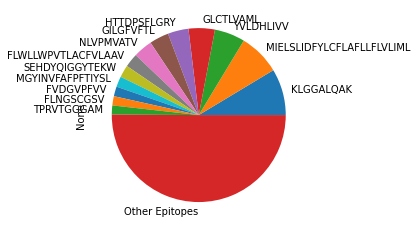

In [61]:
def save_distribution(distribution, filename):
    with open(filename, 'w') as csv_file:  
        writer = csv.writer(csv_file)
        for key, value in distribution.items():
            writer.writerow([key, value])

unique_epitopes = combined_sequences['Epitope'].unique()
unique_tcrs = combined_sequences['CDR3'].unique()
epitope_distribution = combined_sequences['Epitope'].value_counts()
tcr_distribution = combined_sequences['CDR3'].value_counts()
#save_distribution(epitope_distribution, 'epitope_distribution.csv')
#save_distribution(tcr_distribution, 'tcr_distribution.csv')

major_epitope_distribution = epitope_distribution[epitope_distribution >= 2500]
other_epitope_distribution = epitope_distribution[epitope_distribution < 2500]
added_entry = pd.Series([other_epitope_distribution.sum()], index=['Other Epitopes'])
major_epitope_distribution = major_epitope_distribution.append(added_entry)
major_epitope_distribution.plot.pie()

# Final Positive Summary Statistics and Saving File

In [11]:
def combined_summary_stats(df):
    print('Unique Antigen Sequences: ', len(df['Epitope'].unique()))
    print('Unique CDR3 Sequences: ', len(df['CDR3'].unique()))
    print('MHC Class I: ', len(df[df['MHC Class'] == 'MHCI']))
    print('MHC Class II: ', len(df[df['MHC Class'] == 'MHCII']))
    print('VDJDB Pairs: ', len(final_vdjdb))
    print('McPAS Pairs: ', len(final_mcpas))
    print('IEDB Pairs: ', len(final_iedb))
    print('Total Pairs: ', len(df))

print('Combined VDJDB and McPAS Statistics')
combined_summary_stats(combined_sequences)

# Save metadata file
combined_sequences.to_csv('combined_metadata.csv', index=False)
# Get Relevant Columns for training
combined_sequences = combined_sequences[['Epitope', 'CDR3', 'Affinity']]
# Save to File
combined_sequences.to_csv('combined_dataset_positive_only.csv', index=False, header=False)

Combined VDJDB and McPAS Statistics
Unique Antigen Sequences:  982
Unique CDR3 Sequences:  140675
MHC Class I:  150008
MHC Class II:  0
VDJDB Pairs:  6388
McPAS Pairs:  11936
IEDB Pairs:  169223
Total Pairs:  150008


# Negative Data Generation

In [12]:
def random_recombination(df, epitope_dist, tcr_dist, ratio):
    unique_epitopes = df['Epitope'].unique()
    unique_tcrs = df['CDR3'].unique()
    conversion_df = df[['Epitope', 'CDR3']]
    positive_pairs = set([tuple(x) for x in conversion_df.to_numpy()])

    # We want to weight the epitope choice by frequency in data
    epitope_freq_array = [epitope_dist[peptide] / len(df) for peptide in unique_epitopes]
    tcr_freq_array = [tcr_dist[tcr] / len(df) for tcr in unique_tcrs]
    
    neg_pairs = set()
    for pep in unique_epitopes:
        i = 0
        pairs_to_generate = round(epitope_dist[pep] * ratio)
        while i < pairs_to_generate:
            tcr = np.random.choice(unique_tcrs, p=tcr_freq_array)
            pair = (pep, tcr)
            if pair not in positive_pairs and pair not in neg_pairs:
                neg_pairs.add(pair)
                i += 1
            
    negative_data = pd.DataFrame(neg_pairs, columns = ['Epitope', 'CDR3'])
    negative_data = negative_data.assign(Affinity=0)
    return negative_data

# Ratio of negative to positive data
ratio = 1
negative_data = random_recombination(combined_sequences, epitope_distribution, tcr_distribution, ratio)
negative_data
full_data = pd.concat([combined_sequences, negative_data])
full_data = full_data.reset_index(drop=True)
full_data

,Epitope,CDR3,Affinity
0,EAAGIGILTV,CASSLGNEQF,1
1,EAAGIGILTV,CASSLGVATGELF,1
2,EAAGIGILTV,CASSQEEGGGSWGNTIYF,1
3,EAAGIGILTV,CASSQEGLAGASQYF,1
4,EAAGIGILTV,CASSQETDIVFNOPQHF,1
...,...,...,...
300011,AYSNNSIAIPTNFTISV,CASSPRTGQNSPLHF,0
300012,NPLLYDANYFLCW,CAISESRGDSYNEQFF,0
300013,KLGGALQAK,CASSLVGADRSGELFF,0
300014,GLCTLVAML,CASSEGSYTEAFF,0


# Saving the File

In [14]:
# Save to File
full_data.to_csv('combined_dataset.csv', index=False, header=False)